In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
from astropy import units as u

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
search = lk.search_lightcurve(target = "tic346783960")
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 18,2019,SPOC,120,346783960,0.0
1,TESS Sector 18,2019,TESS-SPOC,1800,346783960,0.0
2,TESS Sector 18,2019,QLP,1800,346783960,0.0
3,TESS Sector 58,2022,SPOC,120,346783960,0.0
4,TESS Sector 58,2022,TESS-SPOC,200,346783960,0.0
5,TESS Sector 58,2022,QLP,200,346783960,0.0


In [77]:
search.table["dataURL"] = search.table["dataURI"]
curve_3 = search[4].download()
table = curve_3
x = table.time.value
y = table.flux.value
curve_3

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2882.3370241961716,1.7166804e+07,3.4498318e+02,4.9530123e-03,714905,1085.32006,1597.27768,1.7069966e+07,3.4032541e+02,4.1463176e+04,3.2754356e+01,1.7166804e+07,3.4498318e+02,0,———,———,———,———,1085.32006,2.4084469e-05,1597.27768,2.1620681e-04,2.9475173e-02,-7.7257261e-02
2882.3393390806837,1.7105512e+07,3.4495099e+02,4.9530831e-03,714906,1085.32091,1597.27379,1.7066666e+07,3.4029367e+02,4.1504125e+04,3.2763607e+01,1.7105512e+07,3.4495099e+02,0,———,———,———,———,1085.32091,2.4087996e-05,1597.27379,2.1615352e-04,3.0780369e-02,-7.8921974e-02
2882.341653964731,1.7038040e+07,3.4501218e+02,4.9531534e-03,714907,1085.31987,1597.27535,1.7072652e+07,3.4035403e+02,4.1538707e+04,3.2768730e+01,1.7038040e+07,3.4501218e+02,0,———,———,———,———,1085.31987,2.4083620e-05,1597.27535,2.1617582e-04,2.8972745e-02,-7.9041302e-02
2882.343968849243,1.6974388e+07,3.4501505e+02,4.9532242e-03,714908,1085.32033,1597.27585,1.7072686e+07,3.4035687e+02,4.1547938e+04,3.2797089e+01,1.6974388e+07,3.4501505e+02,0,———,———,———,———,1085.32033,2.4085470e-05,1597.27585,2.1617237e-04,3.0452561e-02,-8.0006719e-02
2882.34628373329,1.6904678e+07,3.4499869e+02,4.9532945e-03,714909,1085.32058,1597.27511,1.7071000e+07,3.4034073e+02,4.1551781e+04,3.2803669e+01,1.6904678e+07,3.4499869e+02,0,———,———,———,———,1085.32058,2.4087909e-05,1597.27511,2.1612305e-04,3.0368609e-02,-7.8197360e-02
2882.348598617802,1.6850390e+07,3.4504657e+02,4.9533653e-03,714910,1085.31988,1597.27660,1.7075866e+07,3.4038797e+02,4.1598184e+04,3.2791416e+01,1.6850390e+07,3.4504657e+02,0,———,———,———,———,1085.31988,2.4083678e-05,1597.27660,2.1619693e-04,2.9499231e-02,-7.7708684e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910.0409557894686,1.7943950e+07,3.4565112e+02,5.1938617e-03,726873,1085.29469,1597.34828,1.7184838e+07,3.4098434e+02,2.9580650e+04,2.8919157e+01,1.7943950e+07,3.4565112e+02,0,———,———,———,———,1085.29469,2.3944765e-05,1597.34828,2.1798542e-04,-1.2186982e-02,6.2887736e-02


In [78]:
danbis_vers = search[5].download()
danbis_vers

time,flux,flux_err,cadenceno,sap_flux,det_flux,det_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,det_flux_sml,det_flux_lag,sys_rm_flux
,,,,,,,,,pix,pix,,,,,
Time,float32,float64,int32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32
2882.337047077235,1.0005815029144287,nan,714905,1.0005815,1.0039381,0.004530168,1073741824,0,1084.9290771484375,1596.653564453125,331.17,4715.93,1.0004463,1.0039381,1.003878
2882.339361961565,1.0006619691848755,nan,714906,1.000662,1.0036414,0.004530168,1073741824,0,1084.9300537109375,1596.6513671875,243.34,4744.06,1.0004336,1.0036414,1.0037181
2882.341676846064,1.00082528591156,nan,714907,1.0008253,1.0030415,0.004530168,1073741824,0,1084.9288330078125,1596.6507568359375,312.69,4465.1,1.0003006,1.0030415,1.0032537
2882.343991730561,1.0007474422454834,nan,714908,1.0007474,1.0040153,0.004530168,1073741824,0,1084.9296875,1596.6500244140625,839.7,4613.79,1.0003899,1.0040153,1.0043617
2882.3463066150584,1.0007236003875732,nan,714909,1.0007236,1.0026478,0.004530168,1073741824,0,1084.9300537109375,1596.6513671875,792.8,5510.14,1.0001979,1.0026478,1.0031264
2882.348621499556,1.0008412599563599,nan,714910,1.0008413,1.0032375,0.004530168,1073741824,0,1084.928955078125,1596.6527099609375,1045.09,5871.55,1.0002848,1.0032375,1.0038475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910.040978705127,1.0013368129730225,nan,726873,1.0013368,0.99670464,0.004530168,1073741824,0,1084.887451171875,1596.7972412109375,2046.45,6098.75,0.99964654,0.99670464,1.0004119


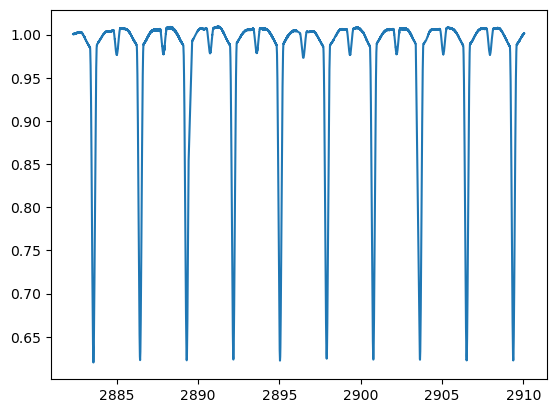

In [79]:
table_new = danbis_vers
x_new = table_new.time.value
y_new = table_new.flux.value
plt.plot(x_new,y_new)
plt.show()

In [80]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(x_new,y_new).autopower()

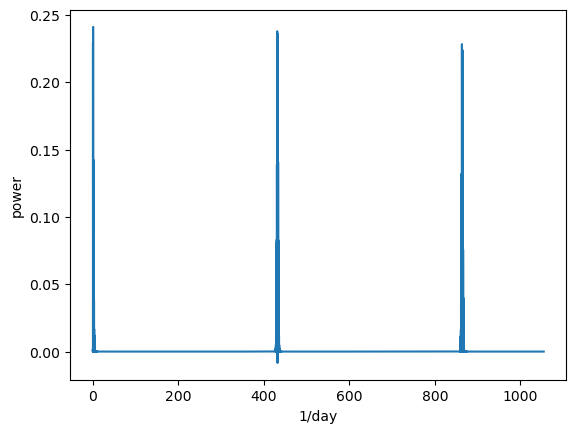

0.2410871254205151


In [81]:
plt.plot(frequency, power)
plt.xlabel("1/day")
plt.ylabel("power")
plt.show()
print(power.max())

In [100]:
index = np.argmax(power)
frequency[index]
period_1 = 1/(frequency[index])

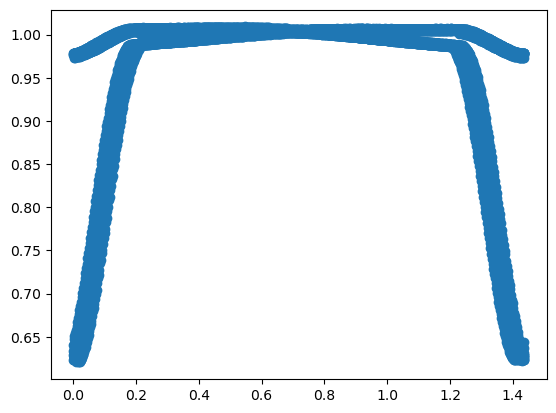

In [101]:
folded_1 = (x_new%period_1)
plt.scatter(folded_1,y_new)

plt.show()
#np.where((folded>0.6)&(folded<0.7))

In [84]:
folded_want = folded[np.where((folded>0.7)&(folded<0.8))]
#print(folded_want)
y_value = y_new[np.where((folded>0.7)&(folded<0.8))]
#print(y_value)
np.median(y_value)
median_y = np.median(y_value)

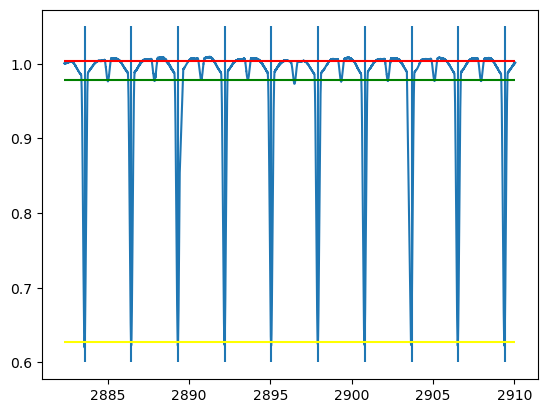

In [90]:
folded[np.where(folded<0.005)]
y = y_new[np.where(folded<0.005)]
np.median(y)
median_low = np.median(y)

plt.plot(x_new,y_new)

plt.vlines(x=[x_new[535]+(period)*i for i in range(10)], ymin=0.6, ymax=1.05)
plt.hlines(y= median_y, xmin = min(x_new), xmax = max(x_new), color = 'red')
plt.hlines(y= median_low, xmin=min(x_new), xmax=max(x_new), color = 'yellow')
plt.hlines(y= flux_b, xmin=min(x_new), xmax=max(x_new), color = 'green')


In [91]:
index = np.argmax(power)
frequency[index]
1/(frequency[index])

1.4360365551475425

In [92]:
np.median(y)
normalization_factor=np.median(y)
print(normalization_factor)

0.62792695


In [93]:
non_normalized_fb = flux_b * normalization_factor
non_normalized_fa = median_low * normalization_factor
non_normalized_ftot = median_y * normalization_factor
non_normalized_ftot - non_normalized_fb
f_a = (non_normalized_ftot - non_normalized_fb)
f_b = non_normalized_fb
print(non_normalized_ftot)
print(f_b)
print(f_a)

0.6304112
0.6140335
0.016377687


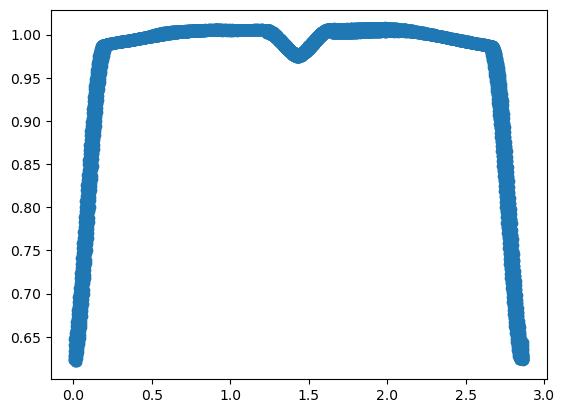

In [102]:
period = (1/(frequency[index]))*2
folded = (x_new%period)
plt.scatter(folded,y_new)
plt.show()

In [94]:
folded[np.where(folded<0.005)]
y = y_new[np.where(folded<0.005)]
np.median(y)
median_low = np.median(y)
print(median_low)

0.62792695


In [95]:
period/2
folded[np.where((folded>1.41)&(folded<1.45))]
flux_y=y_new[np.where((folded>1.41)&(folded<1.45))]
np.median(flux_y)
flux_b= np.median(flux_y)

In [96]:
1/0.036270000000000004
dist_parsecs = 1/0.036270000000000004
distance = dist_parsecs * u.parsec
print(distance)

27.570995312930794 pc


In [97]:
area = (21 * u.arcsecond.to(u.radian) * distance)**2
print(area)

7.87940115808987e-06 pc2


In [48]:
print(f_a)

0.016920924


In [47]:
print(f_b)

0.63439906


Jansky = (2416*Jy)*10^(0.4*Tmag)

In [105]:
M_f_b = (lum_f_b/1.4*s_lum)**(1/4)
print(m_f_b)

NameError: name 's_lum' is not defined

In [64]:

M_starB = (lum_f_b/(1.4*s_lum_b))**(1/4)
print(M_starB)

0.0013817589181079068


In [65]:
def Lum_from_Tess_Flux(Tess_flux, distance):
    """
    Take Flux values from TESS, and convert into intrinsic Luminosities.
   
    Parameters
    ----------
    Tess_flux : float
                Given in Counts (or electrons) per second, pass the float value
    distace   : units of parsecs
                distance to the object in units of parsecs
               
    Returns
    -------
    Watts
        The luminosity of the object in terms of Watts
       
    """
    T_mag = (-2.5*np.log10(Tess_flux)) + 20.4403
   
    Physical_units= (2416*u.Jansky)*10**(12.5065/(T_mag))
   
    hz=(800*u.nm).to(u.Hz, equivalencies=u.spectral())

    dist_in_meters = distance.to(u.m)
   
    Lum=Physical_units.to(u.W/(u.Hz*u.m**2))*hz*dist_in_meters**2
   
    return Lum

In [103]:
print(Lum_from_Tess_Flux(f_b, distance))
lum_f_b = (Lum_from_Tess_Flux(f_b, distance))

2.587249839069911e+28 W


In [104]:
print(Lum_from_Tess_Flux(f_a, distance))
lum_f_a = (Lum_from_Tess_Flux(f_a, distance))

2.0826128718290326e+28 W


In [135]:
s_lum = 3.827E26 * u.watt
M_starA = (lum_f_a/(1.4*s_lum))**(1/3.5)
print(M_starA)

2.845625399848727


In [136]:
M_star_b = (lum_f_b/(1.4*s_lum))**(1/3.5)
print(M_star_b)

3.0276142070058323


In [119]:
import astropy.constants as ac

P**2 = (4*(np.pi**2)/(k**2)*(M1+M2))*(a**3)

In [ ]:
a=((P**2)/((4(np.pi2)/((k)(M1+M2))))**(1/3)

In [133]:
def axis_from_masses(M1,M2,P):
    k = ac.G
    M1_k = M1*u.Msun
    M2_k = M2*u.Msun
    P_days = P*u.day
    a=((P_days.to(u.second)**2)/(4*(np.pi**2)/(k*(M1_k.to(u.kg)+M2_k.to(u.kg)))))**(1/3)
    return a.to(u.pc), a.to(u.au)

In [134]:
print(axis_from_masses(f_a,f_b,period))

(<Quantity 1.64379461e-07 pc>, <Quantity 0.0339057 AU>)
